<a href="https://colab.research.google.com/github/ankity7/Computational-Physics/blob/main/PHY425_lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Runge-Kutta Methods

###Second-Order Runge-Kutta Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
def f(t,x):
  fun=-np.sin(t+x)
  return fun
def F1(h,ti,xi,f):
  v=f(ti,xi)
  return h*v
def F2(h,t,x,f,F1):
  d=f(t,x)
  c=F1(h,t,x,d)
  f1=f(t+h,x+c)
  return h*f1

In [ ]:
def rk_2(x_0,a,b,h,f):
  M=int((b-a)/h)
  x=np.zeros(M+1)
  t=np.linspace(a,b,M+1)
  x[0]=x_0
  for i in range(1,M+1):
    f1=h*f(t[i-1],x[i-1])
    f2=h*f(t[i-1]+h,x[i-1]+f1)
    x[i]=x[i-1]+(f1+f2)/2
  return t,x

In [ ]:
x_0=-(math.pi)/2
a=0
b=2
h=0.2
M=int((b-a)/h)
print(M)
rk_2(x_0,a,b,h,f)

10


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([-1.57079633, -1.01026583, -0.71344127, -0.6567322 , -0.72805849,
        -0.86261005, -1.02883438, -1.21124306, -1.40203304, -1.59719733,
        -1.79465446]))

In [ ]:
def rk_4(x_0,a,b,h,f):
  M=int((b-a)/h)
  x=np.zeros(M+1)
  t=np.linspace(a,b,M+1)
  x[0]=x_0
  for i in range(1,M+1):
    f1=h*f(t[i-1],x[i-1])
    f2=h*f(t[i-1]+h/2,x[i-1]+f1/2)
    f3=h*f(t[i-1]+h/2,x[i-1]+f2/2)
    f4=h*f(t[i-1]+h,x[i-1]+f3)
    x[i]=x[i-1]+(f1+2*f2+2*f3+f4)/6
  return t,x



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun

In [ ]:
def f1(t,x):
  fun=np.sin(x) 
  return fun

In [ ]:
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

In [ ]:
x_0=2.0
a=1
b=3
h=0.2
M=int((b-a)/h)
print(M)

10


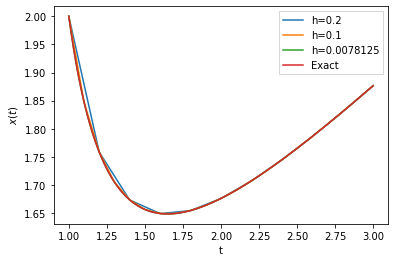

In [ ]:
H=[0.2,0.1,1/128]
ax = plt.subplot()
T=[]
X=[]
for h in H:
  M=int((b-a)/h)
  (t,x)=rk_4(x_0,a,b,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

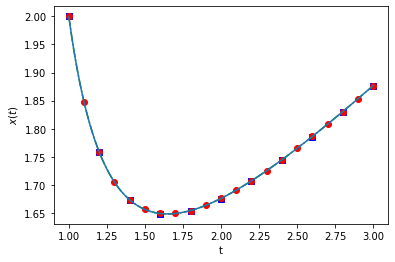

In [ ]:
plt.plot(T[0], X[0], 'bs', T[1], X[1], 'ro', T[2], X[2], 'g-.')
plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()

##Adaptive Runge-Kutta-Fehlberg Method
Numerical Analysis(Mathematics of Scientific Computing) by David Kincaid and Ward Cheney,3rd ed

In [ ]:
import numpy as np
def rk_45(x_0,lower,upper,tol,f):
  a=[16/135,0,6656/12825,28561/56430,-9/50,2/55]
  a_minus_b=[1/360,0,-128/4275,-2197/75240,1/50,2/55]
  c=[0,1/4,3/8,12/13,1,1/2]
  d=[[0],
    [1/4],
    [3/32,9/32],
    [1932/2197,-7200/2197,7296/2197],
    [439/216,-8,3680/513,-845/4104],
    [-8/27,2,-3544/2565,1859/4104,-11/40]]
  
  #intial points and list of points
  t=[]
  t.append(lower)
  x=[]
  x.append(x_0)
  h=0.1 # initial step size
  val=lower
  n=0

  while val < upper:
    F=[]
    aF=[]
    bF=[]
    for i in range(1,7):
      t_i=val+h*c[i-1]
      F_j=[]
      for j in range(1,i):
        F_j.append(d[i-1][j-1]*F[j-1])
      x_dash=sum(F_j)+x[n]
      F.append(h*f(t_i,x_dash))
      aF.append(a[i-1]*f(t_i,x_dash)*h)
      bF.append((-a_minus_b[i-1]+a[i-1])*f(t_i,x_dash)*h)
    
    x_t_plus_h=x[n]+sum(aF)  #fifth order approximation
    val=val+h 
    x_dash_t_plus_h=x[n]+sum(bF) # fourth order approximation
    e=x_t_plus_h-x_dash_t_plus_h # error
    #print(e)
    x.append(x_t_plus_h)
    t.append(val) # corresponding value of x
    '''if abs(e)<tol:
      h=2*h
    else:
      h=h/2'''
    #to control the step size
    h=0.9*h*(tol/abs(e))**(1/4)
    n=n+1
  return t , x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

In [ ]:
x_0=2.0
a=1
b=3

In [ ]:
rk_45(x_0,a,b,tol,f)

([1,
  1.1,
  1.1888189528979947,
  1.310783003356677,
  1.4505913434500828,
  1.6270070468091913,
  1.8448203959657108,
  2.120929436327292,
  2.473426069225094,
  2.9300046073432933,
  3.5279388453984355],
 [2.0,
  1.84777758714516,
  1.7665525272571942,
  1.7009368454841416,
  1.6635779772575883,
  1.648868371534439,
  1.65844230911534,
  1.6942307424461627,
  1.759689266542291,
  1.860315965343622,
  2.0036981651555004])

In [ ]:
(t,x)=rk_45(x_0,a,b,tol,f1)

NameError: ignored

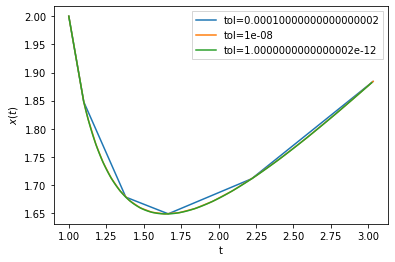

In [ ]:
Tol=[(0.1)**4,(0.01)**4,(0.001)**4] # tol order of h^4
ax = plt.subplot()
T=[]
X=[]
for tol in Tol:
  (t,x)=rk_45(x_0,a,b,tol,f)
  plt.plot(t,x,label=f"tol={tol}")
  T.append(t)
  X.append(x)

# plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

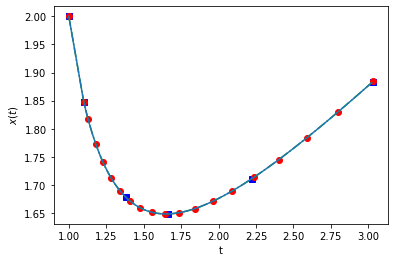

In [ ]:
plt.plot(T[0], X[0], 'bs', T[1], X[1], 'ro', T[2], X[2], 'g-.')
plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()

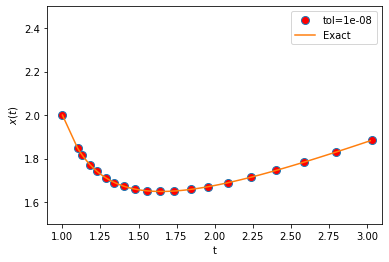

In [ ]:
'''plt.plot(T[0], X[0], 'bs', markerfacecolor='none',markersize=9,label=f"tol={Tol[0]}")'''
plt.plot( T[1], X[1], 'o',markerfacecolor='red', 
         markersize=8,  label=f"tol={Tol[1]}")
#plt.plot( T[2], X[2], 'rs',markersize=3,label=f"tol={Tol[2]}")
plt.plot(t,(real_sol(t)),label="Exact")
plt.axis([a-0.1, b+0.1, 1.5,2.5 ])
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
plt.show()

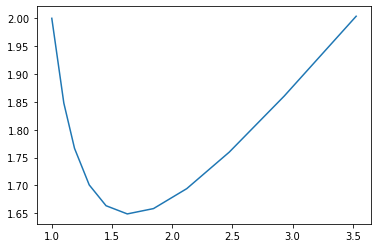

In [ ]:
plt.plot(t,x)
plt,

In [ ]:
a=[16/135,0,6656/12825,28561/56430,-9/50,2/55]
a_minus_b=[1/360,0,-128/4275,-2197/75240,1/50,2/55]
c=[0,1/4,3/8,12/13,1,1/2]
d=[[0,0,0,0,0,0],
    [1/4,0,0,0,0,0],
    [3/32,9/32,0,0,0,0],
    [1932/2197,-7200/2197,7296/2197,0,0,0],
    [439/216,-8,3680/513,-845/4104,0,0],
    [-8/27,2,-3544/2565,1859/4104,-11/40,0]]
for i in range(1,7):
      print('value of i : ',i)
      print()
      for j in range(1,i):
        print(d[i-1][j-1])
      


In [ ]:
a=[16/135,0,6656/12825,28561/56430,-9/50,2/55]
a_minus_b=[1/360,0,-128/4275,-2197/75240,1/50,2/55]
c=[0,1/4,3/8,12/13,1,1/2]
d=[[0],
    [1/4],
    [3/32,9/32],
    [1932/2197,-7200/2197,7296/2197],
    [439/216,-8,3680/513,-845/4104],
    [-8/27,2,-3544/2565,1859/4104,-11/40]]
for i in range(1,7):
      print('value of i : ',i)
      print()
      for j in range(1,i):
        print(d[i-1][j-1])